Temporal Data Types and Algorithms
==================================



In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa

## Time zone handling



### How to do it



In [2]:
ser = pd.Series([
    "2024-01-01 00:00:00",
    "2024-01-02 00:00:01",
    "2024-01-03 00:00:02"
], dtype="datetime64[ns]")
ser

0   2024-01-01 00:00:00
1   2024-01-02 00:00:01
2   2024-01-03 00:00:02
dtype: datetime64[ns]

In [3]:
ser.dt.tz is None

True

In [4]:
ny_ser = ser.dt.tz_localize("America/New_York")
ny_ser

0   2024-01-01 00:00:00-05:00
1   2024-01-02 00:00:01-05:00
2   2024-01-03 00:00:02-05:00
dtype: datetime64[ns, America/New_York]

In [5]:
ny_ser.dt.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [6]:
la_ser = ny_ser.dt.tz_convert("America/Los_Angeles")
la_ser

0   2023-12-31 21:00:00-08:00
1   2024-01-01 21:00:01-08:00
2   2024-01-02 21:00:02-08:00
dtype: datetime64[ns, America/Los_Angeles]

In [7]:
la_ser.dt.tz_localize(None)

0   2023-12-31 21:00:00
1   2024-01-01 21:00:01
2   2024-01-02 21:00:02
dtype: datetime64[ns]

In [8]:
df = la_ser.to_frame().assign(
    datetime=la_ser.dt.tz_localize(None),
    timezone=str(la_ser.dt.tz),
).drop(columns=[0])

df

,datetime,timezone
0,2023-12-31 21:00:00,America/Los_Angeles
1,2024-01-01 21:00:01,America/Los_Angeles
2,2024-01-02 21:00:02,America/Los_Angeles


In [9]:
tz = df["timezone"].drop_duplicates().squeeze()
df["datetime"].dt.tz_localize(tz)

0   2023-12-31 21:00:00-08:00
1   2024-01-01 21:00:01-08:00
2   2024-01-02 21:00:02-08:00
Name: datetime, dtype: datetime64[ns, America/Los_Angeles]

## DateOffsets



### How to do it



In [10]:
ser = pd.Series([
    "2024-01-01",
    "2024-01-02",
    "2024-01-03",
], dtype="datetime64[ns]")
ser

0   2024-01-01
1   2024-01-02
2   2024-01-03
dtype: datetime64[ns]

In [11]:
ser + pd.DateOffset(months=1)

0   2024-02-01
1   2024-02-02
2   2024-02-03
dtype: datetime64[ns]

In [12]:
ser + pd.DateOffset(months=2)

0   2024-03-01
1   2024-03-02
2   2024-03-03
dtype: datetime64[ns]

In [13]:
pd.Series([
    "2024-01-29",
    "2024-01-30",
    "2024-01-31",
], dtype="datetime64[ns]") + pd.DateOffset(months=1)

0   2024-02-29
1   2024-02-29
2   2024-02-29
dtype: datetime64[ns]

In [14]:
ser + pd.DateOffset(months=-1)

0   2023-12-01
1   2023-12-02
2   2023-12-03
dtype: datetime64[ns]

In [15]:
ser + pd.DateOffset(months=1, days=2, hours=3, minutes=4, seconds=5)

0   2024-02-03 03:04:05
1   2024-02-04 03:04:05
2   2024-02-05 03:04:05
dtype: datetime64[ns]

In [16]:
ser + pd.offsets.MonthEnd()

0   2024-01-31
1   2024-01-31
2   2024-01-31
dtype: datetime64[ns]

In [17]:
ser + pd.offsets.MonthBegin()

0   2024-02-01
1   2024-02-01
2   2024-02-01
dtype: datetime64[ns]

### There's more&#x2026;



In [18]:
ser.dt.day_name()

0       Monday
1      Tuesday
2    Wednesday
dtype: object

In [19]:
bd_ser = ser + pd.offsets.BusinessDay(n=3)
bd_ser

0   2024-01-04
1   2024-01-05
2   2024-01-08
dtype: datetime64[ns]

In [20]:
bd_ser.dt.day_name()

0    Thursday
1      Friday
2      Monday
dtype: object

In [21]:
ser + pd.offsets.CustomBusinessDay(
    n=3,
    weekmask="Mon Tue Wed Thu",
)

/tmp/ipykernel_172395/83449446.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  ser + pd.offsets.CustomBusinessDay(


0   2024-01-04
1   2024-01-08
2   2024-01-09
dtype: datetime64[ns]

In [22]:
ser + pd.offsets.CustomBusinessDay(
    n=3,
    weekmask="Mon Tue Wed Thu",
    holidays=["2024-01-04"],
)

/tmp/ipykernel_172395/2255203197.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  ser + pd.offsets.CustomBusinessDay(


0   2024-01-08
1   2024-01-09
2   2024-01-10
dtype: datetime64[ns]

In [23]:
ser + pd.offsets.BusinessMonthEnd()

0   2024-01-31
1   2024-01-31
2   2024-01-31
dtype: datetime64[ns]

## Datetime selection



### How to do it



In [24]:
pd.date_range(start="2023-12-27", freq="10D", periods=5)

DatetimeIndex(['2023-12-27', '2024-01-06', '2024-01-16', '2024-01-26',
               '2024-02-05'],
              dtype='datetime64[ns]', freq='10D')

In [25]:
pd.date_range(start="2023-12-27", freq="2W", periods=5)

DatetimeIndex(['2023-12-31', '2024-01-14', '2024-01-28', '2024-02-11',
               '2024-02-25'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [26]:
pd.date_range(start="2023-12-27", freq="2W-WED", periods=5)

DatetimeIndex(['2023-12-27', '2024-01-10', '2024-01-24', '2024-02-07',
               '2024-02-21'],
              dtype='datetime64[ns]', freq='2W-WED')

In [27]:
pd.date_range(start="2023-12-27", freq="WOM-3THU", periods=5)

DatetimeIndex(['2024-01-18', '2024-02-15', '2024-03-21', '2024-04-18',
               '2024-05-16'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [28]:
pd.date_range(start="2023-12-27", freq="SMS", periods=5)

DatetimeIndex(['2024-01-01', '2024-01-15', '2024-02-01', '2024-02-15',
               '2024-03-01'],
              dtype='datetime64[ns]', freq='SMS-15')

In [29]:
index = pd.date_range(start="2023-12-27", freq="10D", periods=20)
ser = pd.Series(range(20), index=index)
ser.loc[:pd.Timestamp("2024-01-18")]

2023-12-27    0
2024-01-06    1
2024-01-16    2
Freq: 10D, dtype: int64

In [30]:
ser.loc[pd.Timestamp("2024-01-06"):pd.Timestamp("2024-01-18")]

2024-01-06    1
2024-01-16    2
Freq: 10D, dtype: int64

In [31]:
ser.loc["2024-01-06":"2024-01-18"]

2024-01-06    1
2024-01-16    2
Freq: 10D, dtype: int64

In [32]:
ser.loc["2024-02"]

2024-02-05    4
2024-02-15    5
2024-02-25    6
Freq: 10D, dtype: int64

In [33]:
ser.loc["2024-02":"2024-03"]

2024-02-05    4
2024-02-15    5
2024-02-25    6
2024-03-06    7
2024-03-16    8
2024-03-26    9
Freq: 10D, dtype: int64

In [34]:
ser.loc["2024"].head()

2024-01-06    1
2024-01-16    2
2024-01-26    3
2024-02-05    4
2024-02-15    5
Freq: 10D, dtype: int64

### There's more&#x2026;



In [35]:
index = pd.date_range(start="2023-12-27", freq="12h", periods=6, tz="US/Eastern")
ser = pd.Series(range(6), index=index)
ser

2023-12-27 00:00:00-05:00    0
2023-12-27 12:00:00-05:00    1
2023-12-28 00:00:00-05:00    2
2023-12-28 12:00:00-05:00    3
2023-12-29 00:00:00-05:00    4
2023-12-29 12:00:00-05:00    5
Freq: 12h, dtype: int64

In [36]:
ser.loc[:"2023-12-27 11:59:59"]

2023-12-27 00:00:00-05:00    0
Freq: 12h, dtype: int64

In [37]:
ser.loc[:"2023-12-27 12:00:00"]

2023-12-27 00:00:00-05:00    0
2023-12-27 12:00:00-05:00    1
Freq: 12h, dtype: int64

## Resampling



### How to do it



In [38]:
index = pd.date_range(start="2024-01-01", periods=10, freq="s")
ser = pd.Series(range(10), index=index, dtype=pd.Int64Dtype())
ser

2024-01-01 00:00:00    0
2024-01-01 00:00:01    1
2024-01-01 00:00:02    2
2024-01-01 00:00:03    3
2024-01-01 00:00:04    4
2024-01-01 00:00:05    5
2024-01-01 00:00:06    6
2024-01-01 00:00:07    7
2024-01-01 00:00:08    8
2024-01-01 00:00:09    9
Freq: s, dtype: Int64

In [39]:
ser.resample("3s").sum()

2024-01-01 00:00:00     3
2024-01-01 00:00:03    12
2024-01-01 00:00:06    21
2024-01-01 00:00:09     9
Freq: 3s, dtype: Int64

In [40]:
ser.resample("3s", closed="right").sum()

2023-12-31 23:59:57     0
2024-01-01 00:00:00     6
2024-01-01 00:00:03    15
2024-01-01 00:00:06    24
Freq: 3s, dtype: Int64

In [41]:
ser.resample("3s", closed="right", label="right").sum()

2024-01-01 00:00:00     0
2024-01-01 00:00:03     6
2024-01-01 00:00:06    15
2024-01-01 00:00:09    24
Freq: 3s, dtype: Int64

In [42]:
ser.resample("ME").sum()

2024-01-31    45
Freq: ME, dtype: Int64

In [43]:
index = pd.date_range(start="2024-01-01", freq="D", periods=10)
ser = pd.Series(range(10), index=index, dtype=pd.Int64Dtype())
ser

2024-01-01    0
2024-01-02    1
2024-01-03    2
2024-01-04    3
2024-01-05    4
2024-01-06    5
2024-01-07    6
2024-01-08    7
2024-01-09    8
2024-01-10    9
Freq: D, dtype: Int64

In [44]:
ser.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [45]:
ser.resample("W").sum()

2024-01-07    21
2024-01-14    24
Freq: W-SUN, dtype: Int64

In [46]:
ser.resample("W-SAT").sum()

2024-01-06    15
2024-01-13    30
Freq: W-SAT, dtype: Int64

In [47]:
ser.resample("W-WED").sum()

2024-01-03     3
2024-01-10    42
Freq: W-WED, dtype: Int64

In [48]:
ser.resample("12h").asfreq().iloc[:5]

2024-01-01 00:00:00       0
2024-01-01 12:00:00    <NA>
2024-01-02 00:00:00       1
2024-01-02 12:00:00    <NA>
2024-01-03 00:00:00       2
Freq: 12h, dtype: Int64

In [49]:
ser.resample("12h").asfreq().ffill().iloc[:6]

2024-01-01 00:00:00    0
2024-01-01 12:00:00    0
2024-01-02 00:00:00    1
2024-01-02 12:00:00    1
2024-01-03 00:00:00    2
2024-01-03 12:00:00    2
Freq: 12h, dtype: Int64

In [50]:
ser.resample("12h").asfreq().bfill().iloc[:6]

2024-01-01 00:00:00    0
2024-01-01 12:00:00    1
2024-01-02 00:00:00    1
2024-01-02 12:00:00    2
2024-01-03 00:00:00    2
2024-01-03 12:00:00    3
Freq: 12h, dtype: Int64

In [51]:
ser.resample("12h").asfreq().interpolate().iloc[:6]

2024-01-01 00:00:00    0.0
2024-01-01 12:00:00    0.5
2024-01-02 00:00:00    1.0
2024-01-02 12:00:00    1.5
2024-01-03 00:00:00    2.0
2024-01-03 12:00:00    2.5
Freq: 12h, dtype: Float64

### There's more&#x2026;



In [52]:
index = pd.date_range(start="2024-01-01", periods=10, freq="s")
ser = pd.Series(range(10), index=index, dtype=pd.Int64Dtype())
ser

2024-01-01 00:00:00    0
2024-01-01 00:00:01    1
2024-01-01 00:00:02    2
2024-01-01 00:00:03    3
2024-01-01 00:00:04    4
2024-01-01 00:00:05    5
2024-01-01 00:00:06    6
2024-01-01 00:00:07    7
2024-01-01 00:00:08    8
2024-01-01 00:00:09    9
Freq: s, dtype: Int64

In [53]:
ser.resample("3s").sum()

2024-01-01 00:00:00     3
2024-01-01 00:00:03    12
2024-01-01 00:00:06    21
2024-01-01 00:00:09     9
Freq: 3s, dtype: Int64

In [54]:
ser.groupby(pd.Grouper(freq="3s")).sum()

2024-01-01 00:00:00     3
2024-01-01 00:00:03    12
2024-01-01 00:00:06    21
2024-01-01 00:00:09     9
Freq: 3s, dtype: Int64

## Aggregating weekly crime and traffic accidents



### How to do it



In [55]:
df = pd.read_parquet(
    "data/crime.parquet",
).set_index("REPORTED_DATE")

df.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [56]:
df.resample("W").size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [57]:
len(df.sort_index().loc[:'2012-01-08'])

877

In [58]:
len(df.sort_index().loc['2012-01-09':'2012-01-15'])

1071

<Axes: title={'center': 'All Denver Crimes'}, xlabel='REPORTED_DATE'>

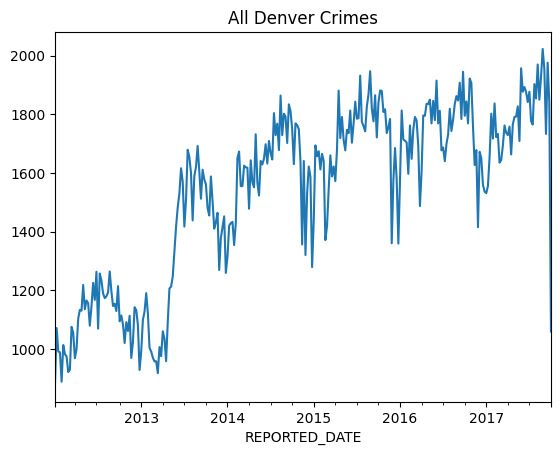

In [59]:
import matplotlib.pyplot as plt
plt.ion()
df.resample("W").size().plot(title="All Denver Crimes")

In [60]:
df.resample("QS")[["IS_CRIME", "IS_TRAFFIC"]].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


<Axes: title={'center': 'Denver Crime and Traffic Accidents'}, xlabel='REPORTED_DATE'>

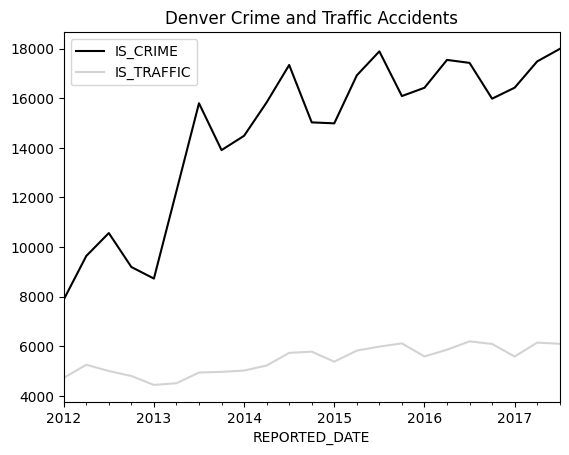

In [61]:
df.resample("QS")[["IS_CRIME", "IS_TRAFFIC"]].sum().plot(
  color=["black", "lightgrey"],
  title="Denver Crime and Traffic Accidents"
)

## Calculating year over year changes in crime by category



### How to do it



In [62]:
df = pd.read_parquet(
    "data/crime.parquet",
)
df.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [63]:
df.groupby([
    "OFFENSE_CATEGORY_ID",
    pd.Grouper(key="REPORTED_DATE", freq="YS"),
], observed=True).agg(
    total_crime=pd.NamedAgg(column="IS_CRIME", aggfunc="sum"),
)

total_crime
OFFENSE_CATEGORY_ID REPORTED_DATE             
aggravated-assault  2012-01-01            1707
                    2013-01-01            1631
                    2014-01-01            1788
                    2015-01-01            2007
                    2016-01-01            2139
...                                        ...
white-collar-crime  2013-01-01             771
                    2014-01-01            1043
                    2015-01-01            1319
                    2016-01-01            1232
                    2017-01-01            1058

[90 rows x 1 columns]

In [64]:
df.groupby([
    "OFFENSE_CATEGORY_ID",
    pd.Grouper(key="REPORTED_DATE", freq="YS"),
], observed=True).agg(
    total_crime=pd.NamedAgg(column="IS_CRIME", aggfunc="sum"),
).assign(
    yoy_change=lambda x: x["total_crime"].pct_change().astype(pd.Float64Dtype())
).head(10)

total_crime  yoy_change
OFFENSE_CATEGORY_ID REPORTED_DATE                         
aggravated-assault  2012-01-01            1707        <NA>
                    2013-01-01            1631   -0.044523
                    2014-01-01            1788     0.09626
                    2015-01-01            2007    0.122483
                    2016-01-01            2139     0.06577
                    2017-01-01            1689   -0.210379
all-other-crimes    2012-01-01            1999    0.183541
                    2013-01-01            9377    3.690845
                    2014-01-01           15507    0.653727
                    2015-01-01           15729    0.014316

In [65]:
yoy_crime = df.groupby([
    "OFFENSE_CATEGORY_ID",
    pd.Grouper(key="REPORTED_DATE", freq="YS"),
], observed=True).agg(
    total_crime=pd.NamedAgg(column="IS_CRIME", aggfunc="sum"),
).assign(
    yoy_change=lambda x: x.groupby(
        level=0, observed=True
    ).pct_change().astype(pd.Float64Dtype())
)

yoy_crime.head(10)

total_crime  yoy_change
OFFENSE_CATEGORY_ID REPORTED_DATE                         
aggravated-assault  2012-01-01            1707        <NA>
                    2013-01-01            1631   -0.044523
                    2014-01-01            1788     0.09626
                    2015-01-01            2007    0.122483
                    2016-01-01            2139     0.06577
                    2017-01-01            1689   -0.210379
all-other-crimes    2012-01-01            1999        <NA>
                    2013-01-01            9377    3.690845
                    2014-01-01           15507    0.653727
                    2015-01-01           15729    0.014316

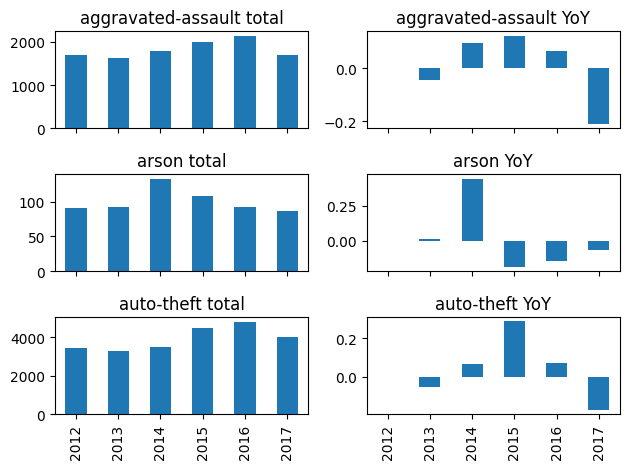

In [66]:
crimes = tuple(("aggravated-assault", "arson", "auto-theft"))
fig, axes = plt.subplots(nrows=len(crimes), ncols=2, sharex=True)

for idx, crime in enumerate(crimes):
    crime_df = yoy_crime.loc[crime]
    ax0 = axes[idx][0]
    ax1 = axes[idx][1]
    crime_df.plot(kind="bar", y="total_crime", ax=ax0, legend=False)
    crime_df.plot(kind="bar", y="yoy_change", ax=ax1, legend=False)

    xlabels = [x.year for x in crime_df.index]
    ax0.set_xticklabels(xlabels)
    ax0.set_title(f"{crime} total")
    ax1.set_xticklabels(xlabels)
    ax1.set_title(f"{crime} YoY")
    ax0.set_xlabel("")
    ax1.set_xlabel("")

plt.tight_layout()

## Accurately measuring sensor-collected events with missing values



### How to do it



In [67]:
df = pd.read_parquet(
    "data/sgi_monitoring.parquet",
    dtype_backend="numpy_nullable",
)

df.head()

,Measurement Title,Measurement Description,Measurement Type,Measurement Medium,Measurement Time,Measurement Value,Units,Units Abbreviation,Measurement Period Type,Data Stream ID,Resource ID,Measurement ID,Record ID,Latitude,Longitude,Location
0,UI Labs Bioswale NWS Probability of Precipitation,<NA>,TimeWindowBoundary,<NA>,07/26/2017 07:00:00 AM,17.0,universal coordinated time,UTC,Instantaneous,33264,65150,2519012303999999999,332642519012303999999999,41.90715,-87.653996,POINT (-87.653996 41.90715)
1,UI Labs Bioswale NWS Probability of Precipitation,<NA>,TimeWindowBoundary,<NA>,06/23/2017 07:00:00 AM,24.0,universal coordinated time,UTC,Instantaneous,33264,65152,2519040815999999999,332642519040815999999999,41.90715,-87.653996,POINT (-87.653996 41.90715)
2,UI Labs Bioswale NWS Probability of Precipitation,<NA>,TimeWindowBoundary,<NA>,06/04/2017 07:00:00 AM,20.0,universal coordinated time,UTC,Instantaneous,33264,65150,2519057231999999999,332642519057231999999999,41.90715,-87.653996,POINT (-87.653996 41.90715)
3,UI Labs Bioswale NWS Probability of Precipitation,<NA>,TimeWindowBoundary,<NA>,09/19/2017 07:00:00 AM,79.0,universal coordinated time,UTC,Instantaneous,33264,65150,2518964783999999999,332642518964783999999999,41.90715,-87.653996,POINT (-87.653996 41.90715)
4,UI Labs Bioswale NWS Probability of Precipitation,<NA>,TimeWindowBoundary,<NA>,06/07/2017 07:00:00 AM,0.0,universal coordinated time,UTC,Instantaneous,33264,65150,2519054639999999999,332642519054639999999999,41.90715,-87.653996,POINT (-87.653996 41.90715)


In [68]:
df["Measurement Time"].head()

0    07/26/2017 07:00:00 AM
1    06/23/2017 07:00:00 AM
2    06/04/2017 07:00:00 AM
3    09/19/2017 07:00:00 AM
4    06/07/2017 07:00:00 AM
Name: Measurement Time, dtype: string

In [69]:
df["Measurement Time"] = pd.to_datetime(
    df["Measurement Time"]
).dt.tz_localize("US/Central")

df["Measurement Time"]

0         2017-07-26 07:00:00-05:00
1         2017-06-23 07:00:00-05:00
2         2017-06-04 07:00:00-05:00
3         2017-09-19 07:00:00-05:00
4         2017-06-07 07:00:00-05:00
                     ...           
4889976   2017-08-26 20:11:55-05:00
4889977   2017-08-26 20:10:54-05:00
4889978   2017-08-26 20:09:53-05:00
4889979   2017-08-26 20:08:52-05:00
4889980   2017-08-26 20:07:50-05:00
Name: Measurement Time, Length: 4889981, dtype: datetime64[ns, US/Central]

In [70]:
df[["Measurement Type", "Units"]].value_counts()

Measurement Type         Units                           
Temperature              degrees Celsius                     721697
DifferentialPressure     pascals                             721671
WindSpeed                meters per second                   721665
Temperature              millivolts                          612313
SoilMoisture             millivolts                          612312
RelativeHumidity         percent                             389424
CumulativePrecipitation  count                               389415
WindDirection            degrees from north                  389413
SoilMoisture             Percent Volumetric Water Content    208391
CumulativePrecipitation  inches                              122762
TimeWindowBoundary       universal coordinated time             918
Name: count, dtype: int64

In [71]:
df[df["Measurement Description"] == "TM1 Temp Sensor"]["Data Stream ID"].value_counts()

Data Stream ID
33305    211584
39197    207193
39176    193536
Name: count, dtype: Int64

In [72]:
mask = (
    (df["Measurement Description"] == "TM1 Temp Sensor")
    & (df["Data Stream ID"] == 39176)
)
df = df[mask].set_index("Measurement Time").sort_index()
df[["Measurement Type", "Units"]].value_counts()

Measurement Type  Units     
Temperature       millivolts    193536
Name: count, dtype: int64

<Axes: xlabel='Measurement Time'>

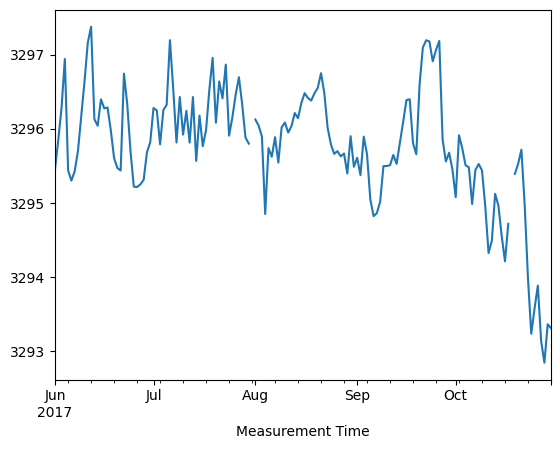

In [73]:
df.resample("D")["Measurement Value"].mean().plot()

In [74]:
df.loc["2017-07-24":"2017-08-01"].resample("D")["Measurement Value"].mean()

Measurement Time
2017-07-24 00:00:00-05:00    3295.908956
2017-07-25 00:00:00-05:00    3296.152968
2017-07-26 00:00:00-05:00    3296.460156
2017-07-27 00:00:00-05:00    3296.697269
2017-07-28 00:00:00-05:00    3296.328725
2017-07-29 00:00:00-05:00    3295.882705
2017-07-30 00:00:00-05:00    3295.800989
2017-07-31 00:00:00-05:00           <NA>
2017-08-01 00:00:00-05:00    3296.126888
Freq: D, Name: Measurement Value, dtype: Float64

<Axes: xlabel='Measurement Time'>

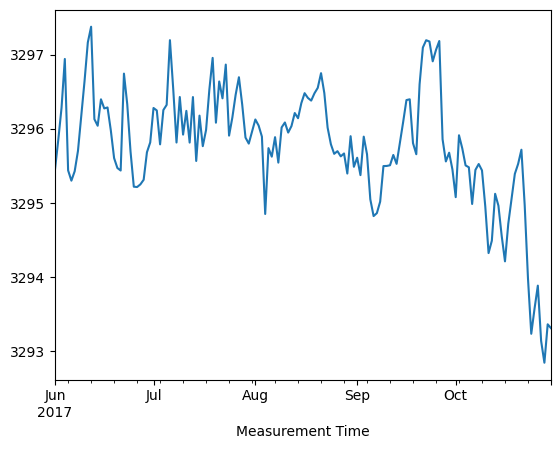

In [75]:
df.resample("D")["Measurement Value"].mean().interpolate().plot()

### There's more&#x2026;



<Axes: xlabel='Measurement Time'>

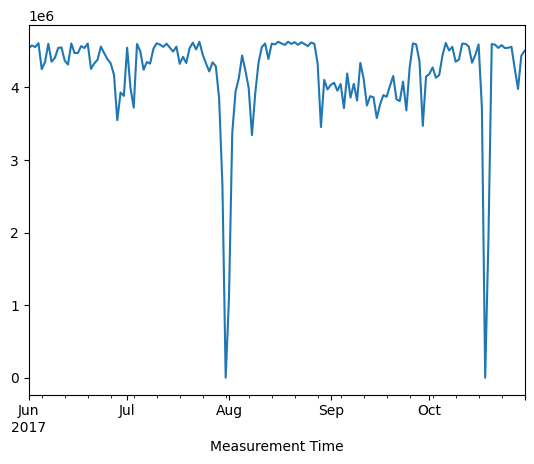

In [76]:
df.resample("D")["Measurement Value"].sum().plot()

In [77]:
df.loc["2017-07-30 15:45:00":"2017-08-01"].head()

,Measurement Title,Measurement Description,Measurement Type,Measurement Medium,Measurement Value,Units,Units Abbreviation,Measurement Period Type,Data Stream ID,Resource ID,Measurement ID,Record ID,Latitude,Longitude,Location
Measurement Time,,,,,,,,,,,,,,,
2017-07-30 15:48:44-05:00,Argyle - Thunder 1: TM1 Temp Sensor,TM1 Temp Sensor,Temperature,Atmosphere,3298.0,millivolts,mV,Instantaneous,39176,73546,2519008530759999999,391762519008530759999999,41.973086,-87.659725,POINT (-87.659725 41.973086)
2017-07-30 15:49:45-05:00,Argyle - Thunder 1: TM1 Temp Sensor,TM1 Temp Sensor,Temperature,Atmosphere,3298.0,millivolts,mV,Instantaneous,39176,73546,2519008530149999999,391762519008530149999999,41.973086,-87.659725,POINT (-87.659725 41.973086)
2017-07-30 15:50:46-05:00,Argyle - Thunder 1: TM1 Temp Sensor,TM1 Temp Sensor,Temperature,Atmosphere,3298.0,millivolts,mV,Instantaneous,39176,73546,2519008529539999999,391762519008529539999999,41.973086,-87.659725,POINT (-87.659725 41.973086)
2017-08-01 15:21:33-05:00,Argyle - Thunder 1: TM1 Temp Sensor,TM1 Temp Sensor,Temperature,Atmosphere,3293.0,millivolts,mV,Instantaneous,39176,73546,2519006819069999999,391762519006819069999999,41.973086,-87.659725,POINT (-87.659725 41.973086)
2017-08-01 15:22:34-05:00,Argyle - Thunder 1: TM1 Temp Sensor,TM1 Temp Sensor,Temperature,Atmosphere,3298.0,millivolts,mV,Instantaneous,39176,73546,2519006818459999999,391762519006818459999999,41.973086,-87.659725,POINT (-87.659725 41.973086)


<Axes: xlabel='Measurement Time'>

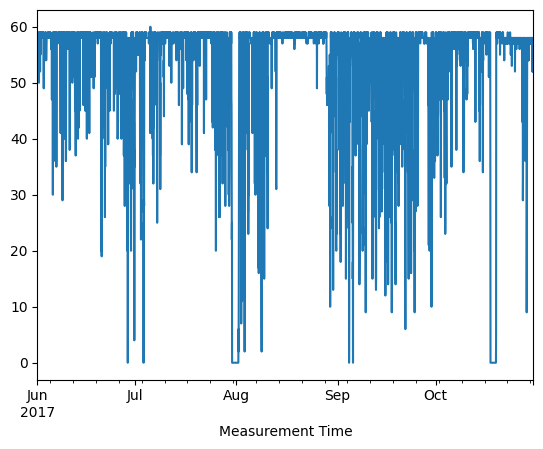

In [78]:
df.resample("h").size().plot()

In [79]:
df.resample("h").size().loc[lambda x: x >= 60]

Measurement Time
2017-07-05 15:00:00-05:00    60
Freq: h, dtype: int64

In [80]:
df.resample("min")["Measurement Value"].sum().interpolate()

Measurement Time
2017-06-01 00:00:00-05:00    3295.0
2017-06-01 00:01:00-05:00    3295.0
2017-06-01 00:02:00-05:00    3295.0
2017-06-01 00:03:00-05:00    3295.0
2017-06-01 00:04:00-05:00    3295.0
                              ...  
2017-10-30 23:55:00-05:00    3293.0
2017-10-30 23:56:00-05:00    3293.0
2017-10-30 23:57:00-05:00       0.0
2017-10-30 23:58:00-05:00    3293.0
2017-10-30 23:59:00-05:00    3293.0
Freq: min, Name: Measurement Value, Length: 218880, dtype: Float64

In [81]:
interpolated = df.resample("min")["Measurement Value"].sum(min_count=1).interpolate()
interpolated

Measurement Time
2017-06-01 00:00:00-05:00    3295.0
2017-06-01 00:01:00-05:00    3295.0
2017-06-01 00:02:00-05:00    3295.0
2017-06-01 00:03:00-05:00    3295.0
2017-06-01 00:04:00-05:00    3295.0
                              ...  
2017-10-30 23:55:00-05:00    3293.0
2017-10-30 23:56:00-05:00    3293.0
2017-10-30 23:57:00-05:00    3293.0
2017-10-30 23:58:00-05:00    3293.0
2017-10-30 23:59:00-05:00    3293.0
Freq: min, Name: Measurement Value, Length: 218880, dtype: Float64

<Axes: xlabel='Measurement Time'>

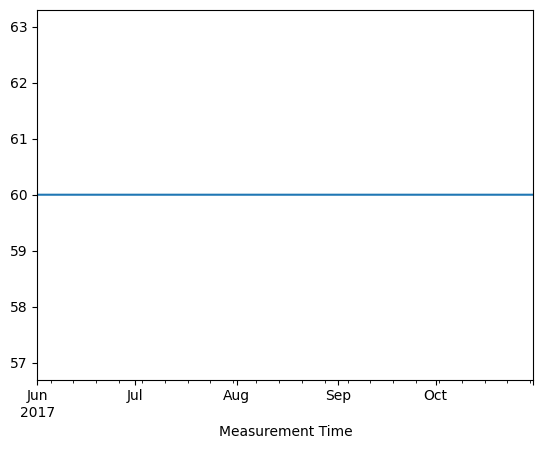

In [82]:
interpolated.resample("h").size().plot()

<Axes: xlabel='Measurement Time'>

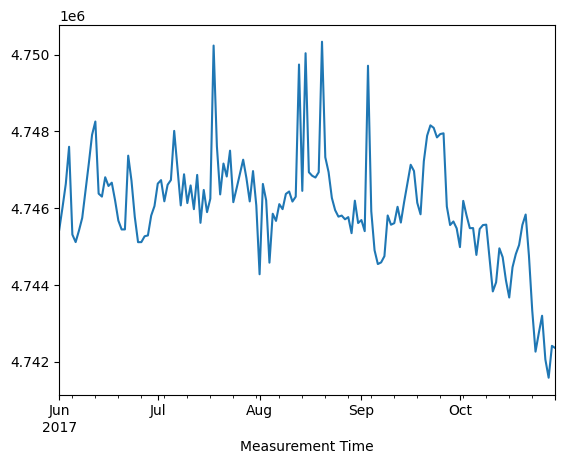

In [83]:
interpolated.resample("D").sum().plot()